In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.ensemble import RandomForestRegressor
from scipy import stats


In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [4]:
smoker_num_df = df.replace(['yes', 'no'], [1, 0])

C:\Users\Manik\AppData\Local\Temp\ipykernel_14940\120053606.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  smoker_num_df = df.replace(['yes', 'no'], [1, 0])


In [5]:
X = df.iloc[: , :-1]
Y = df.iloc[: , 6]

In [6]:
smoker = pd.get_dummies(X['smoker'], drop_first=True)
region = pd.get_dummies(X['region'], drop_first=True)
sex = pd.get_dummies(X['sex'], drop_first=True )

In [7]:
X = X.drop(columns=['sex'])
X = pd.concat([X, sex], axis=1)

In [8]:
X = X.drop(columns=['region'])

In [9]:
X = pd.concat([X, region], axis=1)

In [10]:
X = X.drop(columns=['smoker'])
X = pd.concat([X, smoker], axis=1)

In [11]:
X.rename(columns={'yes': 'smoker'}, inplace=True)

In [12]:
X = X.astype({'male': 'int64', 'northwest': 'int64', 'southeast': 'int64', 'southwest': 'int64' , 'smoker': 'int64'})

In [13]:
X.dtypes

age            int64
bmi          float64
children       int64
male           int64
northwest      int64
southeast      int64
southwest      int64
smoker         int64
dtype: object

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = regressor.predict(X_test)

In [17]:
score = r2_score(y_test, y_pred)
print(score)

0.7999876970680434


In [18]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [19]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
model_score = rf_model.score(X_test, y_test)

print(f"Mean Squared Error : {mse}")
print(f"R^2 Score : {r2}")
print(f"Model Score : {model_score}")

Mean Squared Error : 18662608.503508687
R^2 Score : 0.8827209644797747
Model Score : 0.8827209644797747


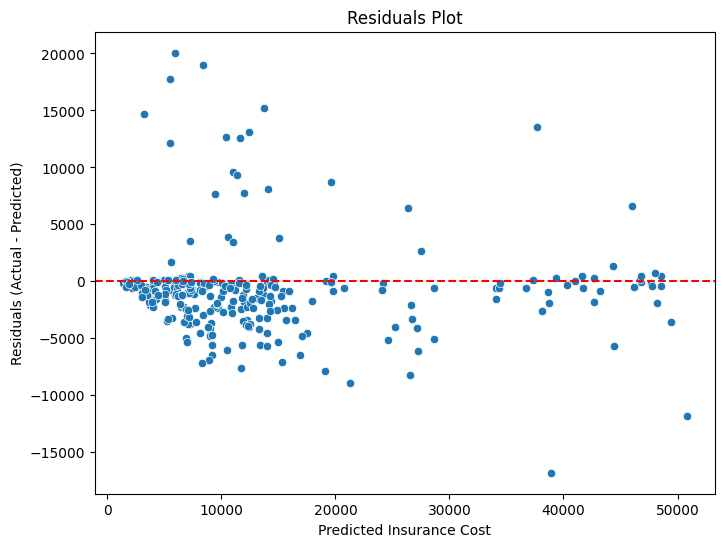

In [22]:
# Residuals
residuals = np.array(y_test) - np.array(y_pred)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')

# Adding labels and title
plt.xlabel('Predicted Insurance Cost')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals Plot')

# Show plot
plt.show()